In [1]:
from ludwig.api import LudwigModel
import pandas

In [2]:
df = pandas.read_csv('rotten_tomatoes.csv')
model = LudwigModel(config='rotten_tomatoes.yaml')
results = model.train(dataset=df)

Created a temporary directory at /tmp/tmpy5vy69bz
Writing /tmp/tmpy5vy69bz/_remote_module_non_scriptable.py


In [3]:
results

TrainingResults(train_stats=TrainingStats(training={'recommended': {'accuracy': [0.47604167461395264, 0.5475893020629883, 0.6222023963928223, 0.6114583611488342, 0.6023809313774109, 0.6753571629524231, 0.6676487922668457, 0.7264285683631897, 0.7881547808647156, 0.7976190447807312, 0.8046428561210632, 0.8273512125015259, 0.8097916841506958, 0.8174107074737549, 0.7096726298332214, 0.7347321510314941, 0.8464285731315613, 0.7619940638542175, 0.8511309623718262, 0.8218749761581421, 0.7670535445213318, 0.8739285469055176, 0.8692857027053833, 0.8700892925262451, 0.8820833563804626, 0.8902975916862488, 0.8235416412353516, 0.8219940662384033, 0.8336904644966125], 'loss': [5.62144660949707, 1.6960020065307617, 0.8127797842025757, 1.114203691482544, 1.076188564300537, 0.7928444743156433, 0.7841793298721313, 0.6187227368354797, 0.4590768814086914, 0.4326455295085907, 0.42272651195526123, 0.3883965015411377, 0.4116394817829132, 0.4063872992992401, 0.6706832051277161, 0.7509438395500183, 0.346342712

In [4]:
model.save('results/experiment_run/model')

In [5]:
model = LudwigModel.load('results/experiment_run/model')

predictions, _ = model.predict(dataset='rotten_tomatoes_test.csv')
predictions.head()

,recommended_probabilities,recommended_predictions,recommended_probabilities_False,recommended_probabilities_True,recommended_probability
0,"[0.05208319425582886, 0.9479168057441711]",True,0.052083,0.947917,0.947917
1,"[0.17940950393676758, 0.8205904960632324]",True,0.179410,0.820590,0.820590
2,"[0.022259831428527832, 0.9777401685714722]",True,0.022260,0.977740,0.977740
3,"[0.020328819751739502, 0.9796711802482605]",True,0.020329,0.979671,0.979671
4,"[0.8697960078716278, 0.1302039921283722]",False,0.869796,0.130204,0.869796


In [1]:
import pandas as pd
import logging
from ludwig.api import LudwigModel
from sklearn.model_selection import train_test_split

In [2]:
data_df = pd.read_json("data.jsonl", lines=True)

In [3]:
train_df, test_df = train_test_split(data_df, test_size=0.2, random_state=0, stratify=data_df[['label']])


In [4]:
# train_df = pd.read_json("train.jsonl", lines=True)
# test_df = pd.read_json("test.jsonl", lines=True)

In [5]:
train_df.head()

,text,label
195038,my being admitted to unza,1
63334,i cant help but feel proud that its me who has...,1
289747,i didnt feel nearly as frightened as i should ...,4
168834,i don t feel like funny,5
357455,i love feedback so feel free to leave comments,1


In [6]:
model = LudwigModel(config="emotion.yaml", logging_level=logging.INFO)

In [7]:
train_stats, preprocessed_data, output_directory = model.train(dataset=train_df)


╒════════════════════════╕
│ EXPERIMENT DESCRIPTION │
╘════════════════════════╛

╒══════════════════╤═════════════════════════════════════════════════════════════════════════════════════════════╕
│ Experiment name  │ api_experiment                                                                              │
├──────────────────┼─────────────────────────────────────────────────────────────────────────────────────────────┤
│ Model name       │ run                                                                                         │
├──────────────────┼─────────────────────────────────────────────────────────────────────────────────────────────┤
│ Output directory │ /home/ec2-user/AutoML-with-Ludwig/results/api_experiment_run_3                              │
├──────────────────┼─────────────────────────────────────────────────────────────────────────────────────────────┤
│ ludwig_version   │ '0.7.4'                                                                                    

Loaded TorchText implementation of distilbert-base-uncased tokenizer
Max length of feature 'text': 185 (without start and stop symbols)
Setting max length using dataset: 187 (including start and stop symbols)
max sequence length is 187 for feature 'text'
Loaded TorchText implementation of distilbert-base-uncased tokenizer
Building dataset: DONE
Writing preprocessed training set cache
Writing preprocessed test set cache
Writing preprocessed validation set cache
Writing train set metadata

Dataset Statistics
╒════════════╤═══════════════╤════════════════════╕
│ Dataset    │   Size (Rows) │ Size (In Memory)   │
╞════════════╪═══════════════╪════════════════════╡
│ Training   │        233413 │ 26.93 Mb           │
├────────────┼───────────────┼────────────────────┤
│ Validation │         33344 │ 3.85 Mb            │
├────────────┼───────────────┼────────────────────┤
│ Test       │         66690 │ 7.70 Mb            │
╘════════════╧═══════════════╧════════════════════╛

╒═══════╕
│ MODEL │

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Created a temporary directory at /tmp/tmpuov5oqjy
Writing /tmp/tmpuov5oqjy/_remote_module_non_scriptable.py
Tuning batch size...
Tuning batch size...
Exploring batch_size=2
Throughput at batch_size=2: 264.13325 samples/s
Exploring batch_size=4
Throughput at batch_size=4: 447.28508 samples/s
Exploring batch_size=8
Throughput at batch_size=8: 564.96552 samples/s
Exploring batch_size=16
Throughput at batch_size=16: 651.89047 samples/s
Exploring batch_size=32
Throughput at batch_size=32: 720.44642 samples/s
Exploring batch_size=64
Throughput at batch_size=64: 759.93663 samples/s
Exploring batch_size=128
Throughput at batch_size=128: 777.01074 samples/s
Exploring batch_size=256
Throughput at batch_size=256: 784.77107 samples/s
Exploring batch_size=512
Throughput at batch_size=512: 783.84413 samples/s
Throughput decrease at batch_size=512
Selected batch_size=256

╒══════════╕
│ TRAINING │
╘══════════╛

Creating fresh model training run.
Training for 912 step(s), approximately 1 epoch(s).
Ear

In [8]:
test_stats, predictions, output_directory = model.evaluate(test_df, collect_predictions=True, collect_overall_stats=True)

Loaded TorchText implementation of distilbert-base-uncased tokenizer
Evaluation: 100%|██████████| 326/326 [01:47<00:00,  3.04it/s]

===== label =====
accuracy: 0.26188743114471436
hits_at_k: 0.613876223564148
loss: 4.630124568939209
overall_stats: { 'avg_f1_score_macro': 0.22440922620133555,
  'avg_f1_score_micro': 0.37249586142367025,
  'avg_f1_score_weighted': 0.3085016529407563,
  'avg_precision_macro': 0.35494258086206104,
  'avg_precision_micro': 0.37249586142367025,
  'avg_precision_weighted': 0.37249586142367025,
  'avg_recall_macro': 0.261887441130776,
  'avg_recall_micro': 0.37249586142367025,
  'avg_recall_weighted': 0.37249586142367025,
  'kappa_score': 0.153485952236317,
  'token_accuracy': 0.37249586142367025}
per_class_stats: {1: {   'accuracy': 0.7033540462081044,
    'f1_score': 0.330943426855334,
    'fall_out': 0.04770798578370927,
    'false_discovery_rate': 0.3007888418886475,
    'false_negative_rate': 0.7832281845892111,
    'false_negatives': 22098,
    'false_om

/home/ec2-user/anaconda3/envs/ludwig/lib/python3.10/site-packages/ludwig/utils/visualization_utils.py:1167: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""] + labels, rotation=45, ha="left")
/home/ec2-user/anaconda3/envs/ludwig/lib/python3.10/site-packages/ludwig/utils/visualization_utils.py:1168: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([""] + labels, rotation=45, ha="right")


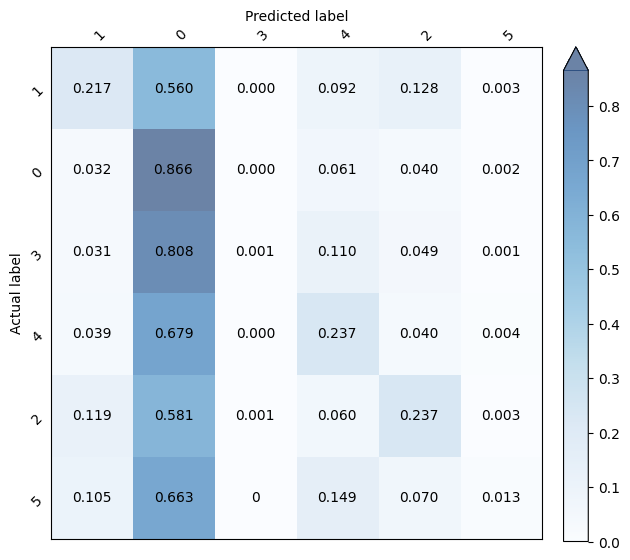

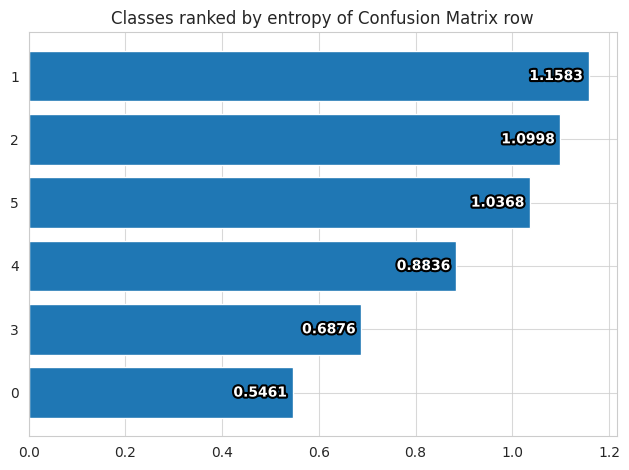

In [9]:
from ludwig.visualize import confusion_matrix
confusion_matrix([test_stats], model.training_set_metadata, 'label', top_n_classes=[6], model_names=[''], normalize=True)

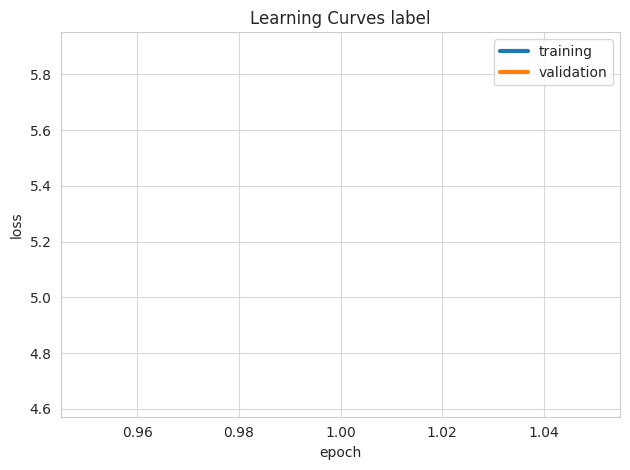

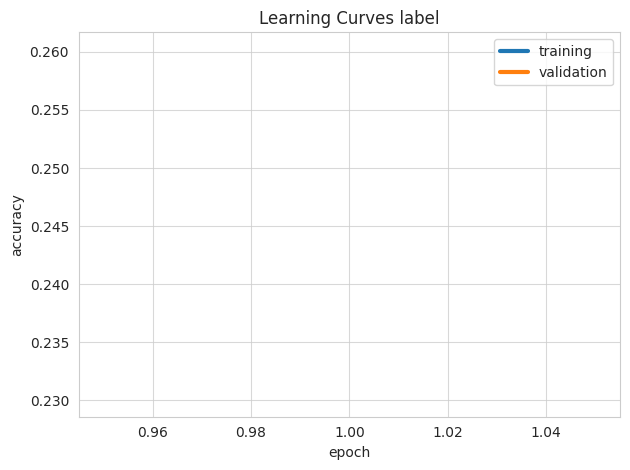

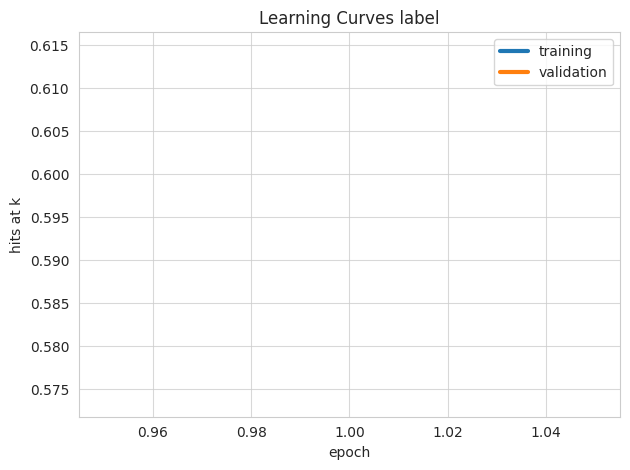

In [10]:
from ludwig.visualize import learning_curves

learning_curves(train_stats, output_feature_name='label')